In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from scipy import stats
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import linear_model
from sklearn.metrics import precision_recall_curve
from sklearn import tree
from sklearn import ensemble
from sklearn import neural_network

In [68]:
df = pd.read_csv("./Loan Default Data.csv")

In [69]:
df.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [70]:
df = df.loc[:,('Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?')]

In [71]:
print(df.dtypes)

Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object


In [72]:
df.head(5)

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [73]:
df.isnull().any()

Employed         False
Bank Balance     False
Annual Salary    False
Defaulted?       False
dtype: bool

In [74]:
# visuallization

## Data Visualization

In [75]:
df.boxplot(figsize=(10,10))

<Axes: >

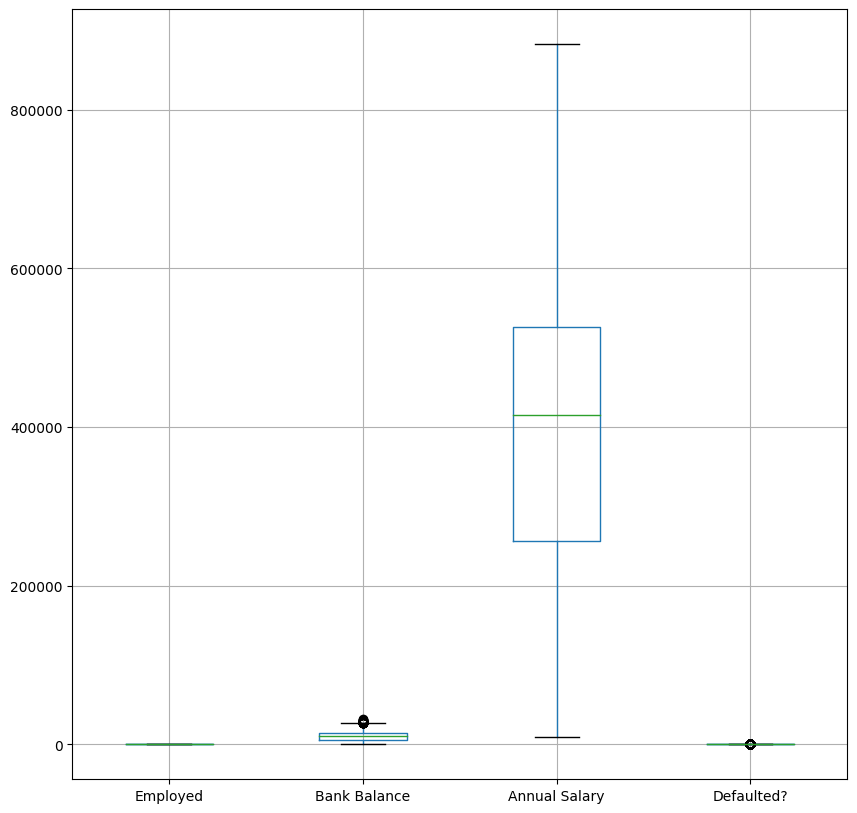

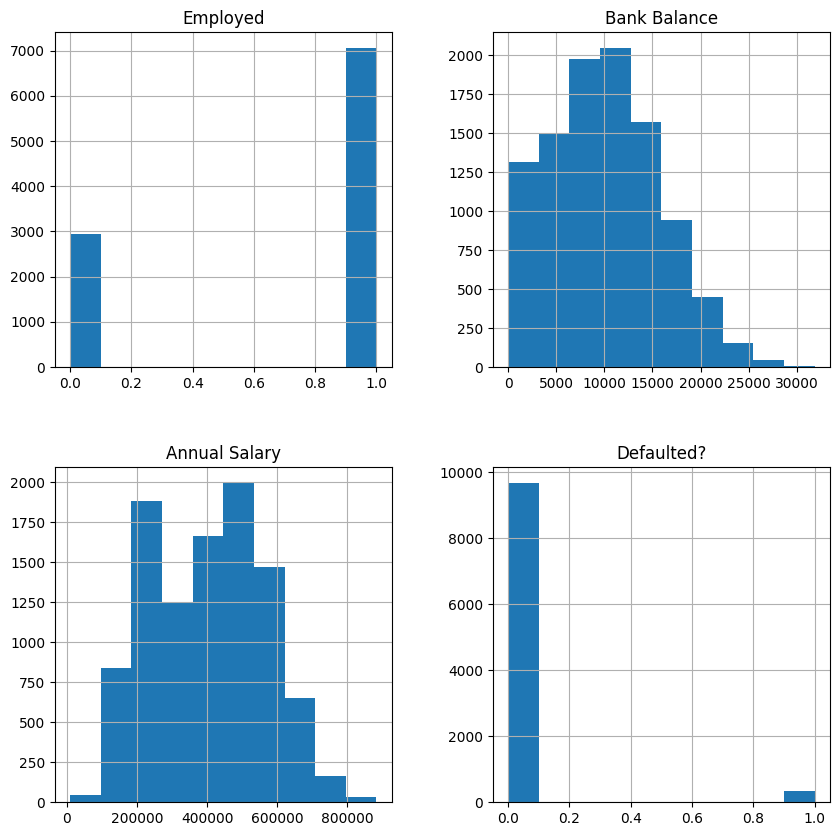

In [76]:
df.hist(figsize=(10,10))
plt.show()

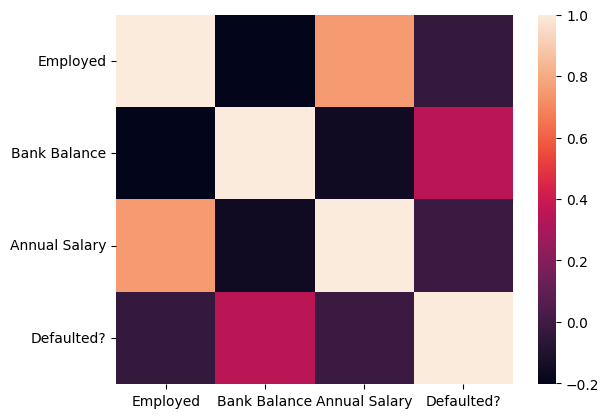

In [77]:
sns.heatmap(df.corr())
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


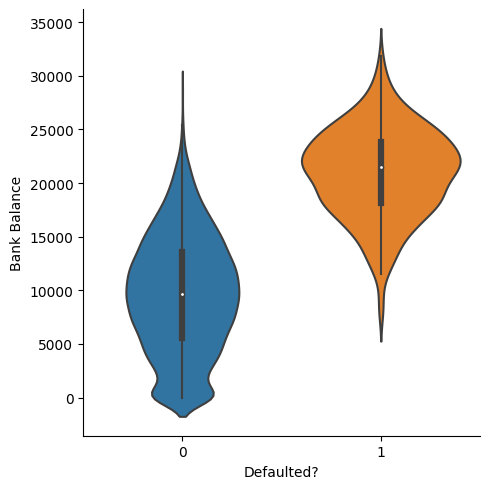

In [78]:
sns.catplot(data = df, x = 'Defaulted?', y = 'Bank Balance', kind = "violin")
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


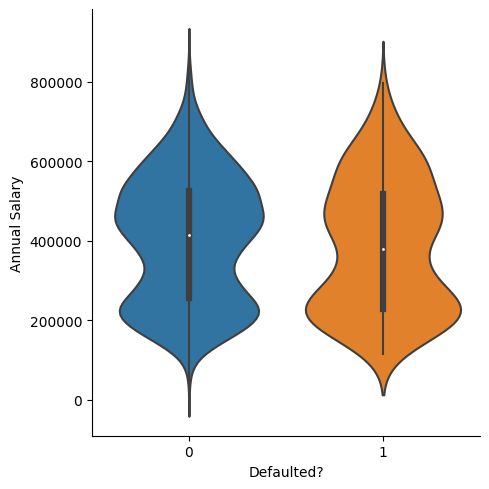

In [79]:
sns.catplot(data = df, x = 'Defaulted?', y = 'Annual Salary', kind = "violin")
plt.show()

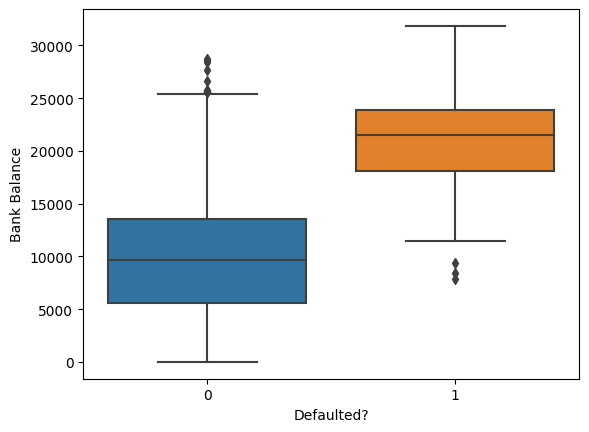

In [80]:
sns.boxplot(x = 'Defaulted?', y = 'Bank Balance', data=df)
plt.show()

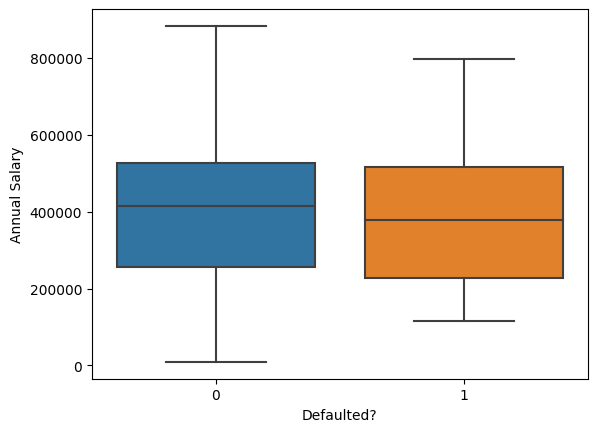

In [81]:
sns.boxplot(x = 'Defaulted?', y = 'Annual Salary', data=df)
plt.show()

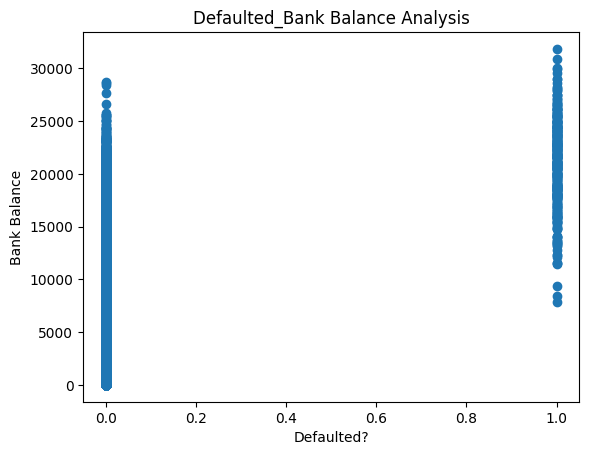

In [82]:
plt.scatter(df['Defaulted?'], df['Bank Balance'])
plt.title("Defaulted_Bank Balance Analysis")
plt.xlabel("Defaulted?")
plt.ylabel("Bank Balance")
plt.show()

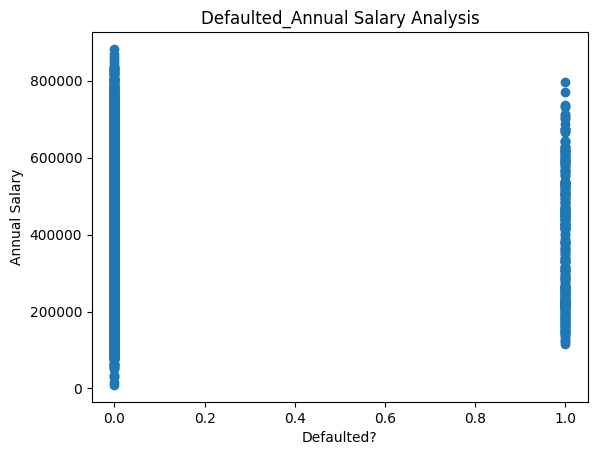

In [83]:
plt.scatter(df['Defaulted?'], df['Annual Salary'])
plt.title("Defaulted_Annual Salary Analysis")
plt.xlabel("Defaulted?")
plt.ylabel("Annual Salary")
plt.show()

## Data Preprocessing

In [84]:
# get dummy variables for categorical columns

dummy = pd.get_dummies(df["Employed"])
df = df.merge(dummy,left_index=True,right_index=True)
df = df.drop(columns="Employed")

In [85]:
# set X and Y

X = df.drop(columns = "Defaulted?")
X.columns = X.columns.astype(str)
Y = df["Defaulted?"]

In [86]:
# split the data into train & test

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)

In [87]:
# check for imbalance

Y_train.value_counts()

Defaulted?
0    7246
1     254
Name: count, dtype: int64

In [88]:
# oversample the minority

X_train,Y_train = SMOTE(random_state=1).fit_resample(X_train,Y_train)

In [89]:
# result for oversample

Y_train.value_counts()

Defaulted?
1    7246
0    7246
Name: count, dtype: int64

In [90]:
# get "annual salary" and "Bank Balance" z-score 

X_train["Annual Salary"] = stats.zscore(X_train["Annual Salary"])
X_test["Annual Salary"] = stats.zscore(X_test["Annual Salary"])

In [91]:
X_train["Bank Balance"] = stats.zscore(X_train["Bank Balance"])
X_test["Bank Balance"] = stats.zscore(X_test["Bank Balance"])

## Machine Learning: Logistic Model

In [92]:
model = linear_model.LogisticRegression(random_state=1)

In [93]:
model.fit(X_train,Y_train)

LogisticRegression(random_state=1)

In [94]:
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.6024


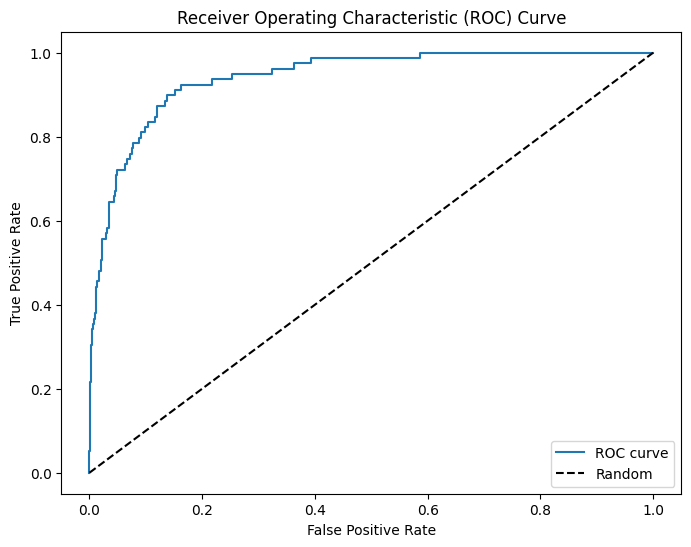

In [95]:
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

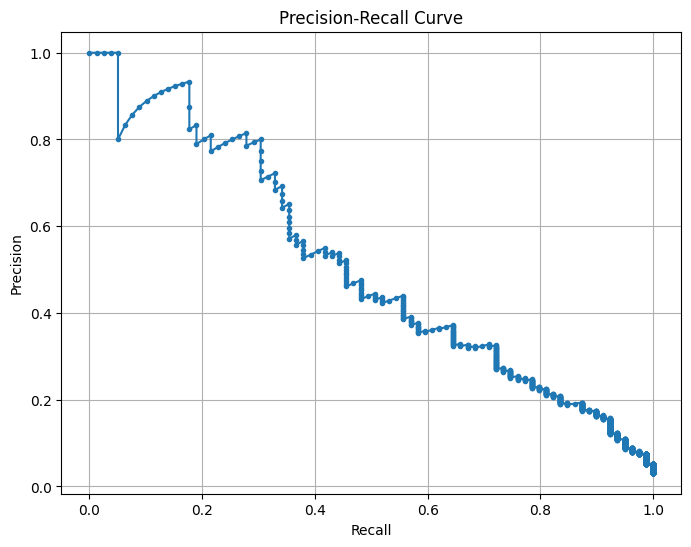

In [96]:
precision, recall, thresholds = precision_recall_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


## Machine Learning: Tree

In [97]:
model = tree.DecisionTreeClassifier(random_state=1)

In [98]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.712


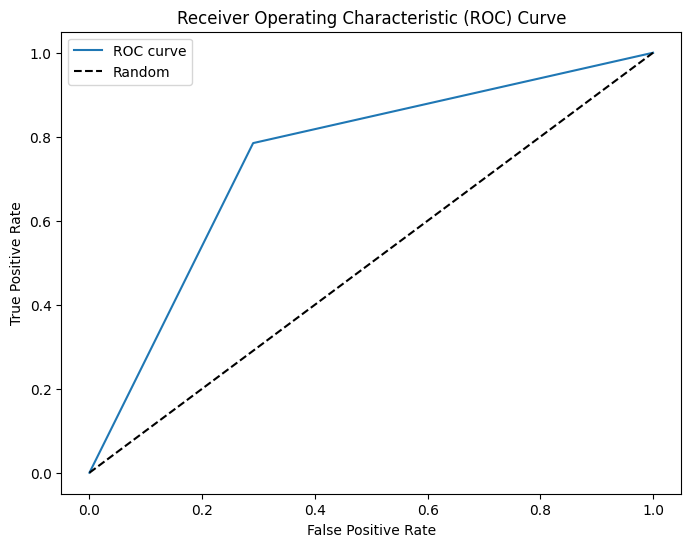

In [99]:
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Machine Learning: Random Forest

In [100]:
model = ensemble.RandomForestClassifier(random_state=1)

In [101]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.6736


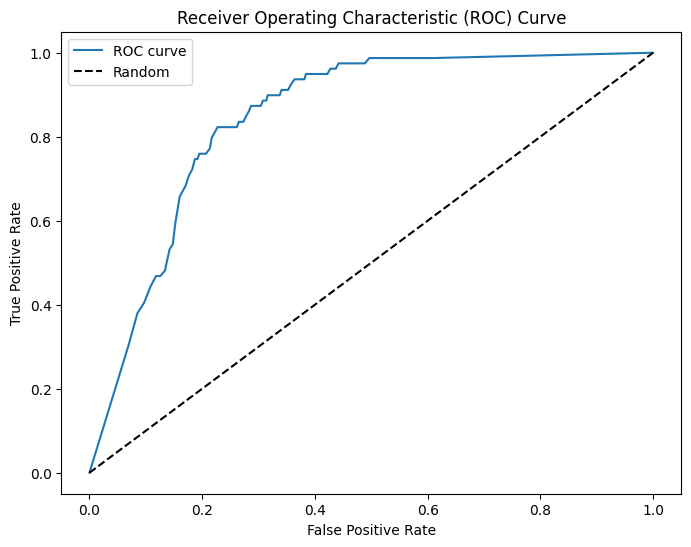

In [102]:
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Machine Learning: Gradient Boosting

In [103]:
model = ensemble.GradientBoostingClassifier(random_state=1)

In [104]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.606


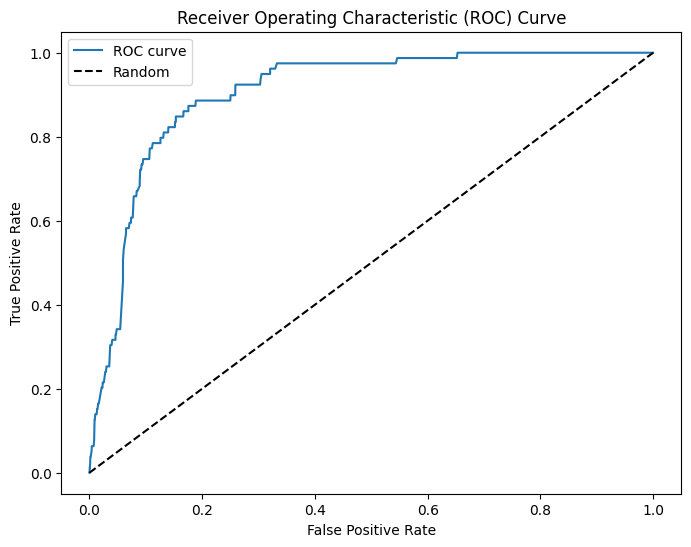

In [105]:
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Machine Learning: Neural Network

In [106]:
model = neural_network.MLPClassifier(random_state=1)

In [107]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print("accuracy is ", (cm[0,0]+cm[1,1])/(sum(sum(cm))))

accuracy is  0.5868


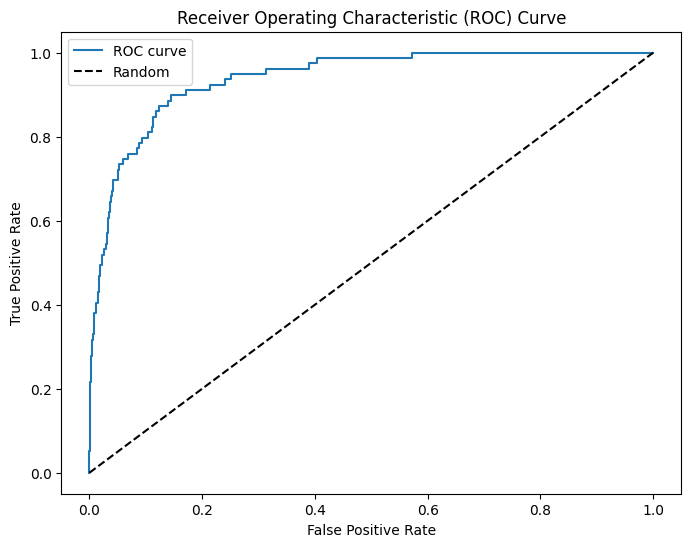

In [108]:
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## The pros and cons of the model

### Regression
Pros
1. The regression model is the simplest equation using which the relationship between the multiple predictor variables and predicted variable can be expressed.
2. The modeling speed of Linear regression is fast as it does not require complicated calculations and runs predictions fast when the amount of data is large.
3. The ability of Linear regression to determine the relative influence of one or more predictor variables to the predicted value when the predictors are independent of each other is one of the key reasons of the popularity of Linear regression. The model derived using this method can express the what change in the predictor variable causes what change in the predicted or target variable.

Cons
1. regression makes strong assumptions that there is Predictor (independent) and Predicted (dependent) variables are linearly related which may not be the case.
2. Outliers can have a large effect on the output, as the Best Fit Line tries to minimize the MSE for the outlier points as well, resulting in a model that is not able to capture the information in the data.
3. Assumes that the predictor variables are not correlated which is rarely true. It is important to, therefore, remove multicollinearity (using dimensionality reduction techniques) because the technique assumes that there is no relationship among independent variables. In cases of high multicollinearity, two features that have high correlation will influence each other’s weight and result in an unreliable model.

### Decision Tree
Pros
1. The decision tree model can be used for both classification and regression problems, and it is easy to interpret, understand, and visualize. 
2. The output of a decision tree can also be easily understood. 
3. Compared with other algorithms, data preparation during pre-processing in a decision tree requires less effort and does not require normalization of data.

Cons
1. Overfitting is one of the practical difficulties for decision tree models. It happens when the learning algorithm continues developing hypotheses that reduce the training set error but at the cost of increasing test set error. But this issue can be resolved by pruning and setting constraints on the model parameters. 
2. Decision trees cannot be used well with continuous numerical variables. 
3. A small change in the data tends to cause a big difference in the tree structure, which causes instability. 

### Random Forest
Pros
1. Among all the available classification methods, random forests provide the highest accuracy.
2. The random forest technique can also handle big data with numerous variables running into thousands. 
3. The random forest can handle missing data by substituting with the variable appearing the most in a particular node.
4. The method also handles variables fast, making it suitable for complicated tasks.

Cons
1. Random forest may not get good results for small data or low-dimensional data (data with few features). Since the randomness becomes greatly reduced.
2. Random forest is like a black box that we have little control over. Its computations may go far more complex compared to other algorithms. And it is not easily interpretable-it provides feature importance but it does not provide complete visibility into the coefficients as linear regression.
3. Random forest may overfit for data with much noise. Decision trees tend to be overfitted in prediction, random forest reduces the degree of overfitting through voting, but its prediction is still overfitting compared to linear model, which is characterized by good matching of existing data. But very conservative with unknown data, and high probability of false negative error.

### Gradient Boosting
Pros
1. the ability to handle multiple potential predictor variables.

Cons
1. its tendency to overfit. Overfitting means that a model matches too closely to the historical data.